In [1]:
### Si données locales
library(Matrix)
u.user <- read.csv(file='u.user.csv', sep='|', header=T)
u.item <- read.csv(file='u.item.csv', sep='|', header=T)
u.data <- read.csv(file='u.data.csv', sep='|', header=T)

m.sparse <- sparseMatrix(u.data[,1],u.data[,2],x=u.data[,3])
rownames(m.sparse) <- paste('u', 1:nrow(m.sparse), sep='')
colnames(m.sparse) <- paste('i', 1:ncol(m.sparse), sep='')

m <- as.matrix(m.sparse)                # transforme en matrice ordinaire
m.na <- m
m.na[m.na==0] <- NA

# Cosinus normal des lignes d'une matrice
matrix.cos <- function(m) {
     (m %*% t(m)) / ( t(matrix(sqrt(rowSums(m^2)),nrow(m),nrow(m)))
                    * (sqrt(rowSums(m^2))) )
}
# on normalise les ages
u.user.norm <- u.user
u.user.norm$age = (u.user.norm$age - min(u.user.norm$age)) / (max(u.user.norm$age) - min(u.user.norm$age))

# on normalise les votes
u.data.norm <- u.data
u.data.norm$rating = (u.data.norm$rating - min(u.data.norm$rating)) / (max(u.data.norm$rating) - min(u.data.norm$rating))

m.na.norm <- m.na/5
m.norm <- m/5



In [2]:
mae <- function(m1, m2) mean(abs(m1 - m2), na.rm=T)

In [3]:
head(m)

,i1,i2,i3,i4,i5,i6,i7,i8,i9,i10,...,i1673,i1674,i1675,i1676,i1677,i1678,i1679,i1680,i1681,i1682
u1,5,3,4,3,3,5,4,1,5,3,...,0,0,0,0,0,0,0,0,0,0
u2,4,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
u3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
u4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
u5,4,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
u6,4,0,0,0,0,0,2,4,4,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# merge users and ratings
names(u.user)<- c('user.id','age','gender','job')
u.user <- u.user[,c(-5)]
head(u.user)

names(u.data)<- c('user.id','movie.id','rating')
u.data <- u.data[,c(-4)]
head(u.data)

u.item <- u.item[,c(-2,-3,-4,-5)]
head(u.item)

u.r <- merge(u.user, u.data, by = "user.id")
head(u.r)
# merge userRating with movie to have actual movie titles instead of ids
u.r.v <- merge(u.r, u.item, by = "movie.id")
head(u.r.v)


user.id,age,gender,job
1,24,M,technician
2,53,F,other
3,23,M,writer
4,24,M,technician
5,33,F,other
6,42,M,executive


user.id,movie.id,rating
196,242,3
186,302,3
22,377,1
244,51,2
166,346,1
298,474,4


movie.id,unknown,Action,Adventure,Animation,Children.s,Comedy,Crime,Documentary,Drama,Fantasy,Film.Noir,Horror,Musical,Mystery,Romance,Sci.Fi,Thriller,War,Western
1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
6,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


user.id,age,gender,job,movie.id,rating
1,24,M,technician,259,1
1,24,M,technician,264,2
1,24,M,technician,194,4
1,24,M,technician,183,5
1,24,M,technician,40,3
1,24,M,technician,226,3


movie.id,user.id,age,gender,job,rating,unknown,Action,Adventure,Animation,...,Fantasy,Film.Noir,Horror,Musical,Mystery,Romance,Sci.Fi,Thriller,War,Western
1,918,40,M,scientist,3,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,684,28,M,student,4,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,660,26,M,student,3,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,339,35,M,lawyer,5,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,699,44,M,other,3,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,94,26,M,student,4,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [5]:
library(randomForest)

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.


In [6]:
head(u.r.v)

movie.id,user.id,age,gender,job,rating,unknown,Action,Adventure,Animation,...,Fantasy,Film.Noir,Horror,Musical,Mystery,Romance,Sci.Fi,Thriller,War,Western
1,918,40,M,scientist,3,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,684,28,M,student,4,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,660,26,M,student,3,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,339,35,M,lawyer,5,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,699,44,M,other,3,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,94,26,M,student,4,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [7]:
formula <- as.factor(rating) ~ .


In [8]:
new.m.cv <- function(dimRedu){
# matrice diagonale pour réduire les matrices originales
m.d2 <- diag(c(m.svd$d[1:dimRedu],rep(0,length(m.svd$d)-dimRedu)))
# nouvelle matrice basée sur les deux premières dimensions uniquement
m.svd2 <- round((m.svd$u %*% m.d2 %*% t(m.svd$v)),2)
mae(m.svd2[i.test.c], m.na[i.test.c])
    }
to.plot <- c()

In [ ]:
i.observed <- dim(u.r.v)[1]
set.seed(5)
i.hasard <- sample(seq(1,i.observed,1), i.observed)
fold.size <- round(length(i.hasard) / 5)
i.false <- rep(FALSE, dim(u.r.v)[1])
for (i in 1:5){
fold.number <- i

## Index booléen pour les cellules de test et d'entraînement
i.test.b <- i.false
## Les cellules indexées du replis correspondant sont fixées à TRUE pour le test...
i.test.b[ i.hasard[((fold.number-1) * fold.size):((fold.number) * fold.size)] ] <- TRUE
    

## ...et à FALSE pour l'entraînement
i.train.b <-  !i.test.b
u.r.v.train <- u.r.v[i.train.b,]
u.r.v.test <- u.r.v[i.test.b,]

rf <- randomForest(formula, data = u.r.v.train, ntree = 50)
new.m <- m
i.test.c <- rep(FALSE,943*1682)
for (j in seq_len(fold.size)){
    new.m[u.r.v.test[j,2],u.r.v.test[j,1]]<-0
    i.test.c[943*(u.r.v.test[j,1]-1)+u.r.v.test[j,2]]<-TRUE
}
for (k in seq_len(943)){
    for (l in seq_len(1682)){
        if (new.m[k,l]==0){
            new.m[k,l]<- predict(rf, newdata = cbind(u.item[l,],u.user[k,])) 
        }
    }
}
write.table(new.m,file=paste("rF2_", toString(i), ".csv", sep = "")) # drops the rownames
write.table(i.test.c,file=paste("rFTestc2_", toString(i), ".csv", sep = "")) # drops the rownames
write.table(i.test.b,file=paste("rFTestb2_", toString(i), ".csv", sep = "")) # drops the rownames
m.train <- new.m
m.train <- m.train
m.svd <- svd(m.train)
to.plot<-rbind(to.plot,unlist(lapply(seq(22), new.m.cv)))
    }


In [11]:
table = list()
test = list()

In [12]:
table[[1]] <- read.table(file=paste("rF1_1.csv", sep = "")) # drops the rownames
table[[2]] <- read.table(file=paste("rF1_2.csv", sep = "")) # drops the rownames
table[[3]] <- read.table(file=paste("rF1_3.csv", sep = "")) # drops the rownames
table[[4]] <- read.table(file=paste("rF1_4.csv", sep = "")) # drops the rownames
table[[5]] <- read.table(file=paste("rF1_5.csv", sep = "")) # drops the rownames

test[[1]] <- read.table(file=paste("rFTestc1_1.csv", sep = "")) # drops the rownames
test[[2]] <- read.table(file=paste("rFTestc1_2.csv", sep = "")) # drops the rownames
test[[3]] <- read.table(file=paste("rFTestc1_3.csv", sep = "")) # drops the rownames
test[[4]] <- read.table(file=paste("rFTestc1_4.csv", sep = "")) # drops the rownames
test[[5]] <- read.table(file=paste("rFTestc1_5.csv", sep = "")) # drops the rownames



In [35]:
for (i in 1:5){
m.train <- data.matrix(table[[i]])
i.test.c <- unlist(test[[i]])
print(mae(m.train[i.test.c],m.na[i.test.c]))
m.svd <- svd(m.train)
to.plot<-rbind(to.plot,unlist(lapply(seq(22), new.m.cv)))
    }

[1] 0.81275
[1] 0.828
[1] 0.8174
[1] 0.81555
[1] 0.8102


In [36]:
to.plot<-apply(to.plot,2,unlist)

In [37]:
sdev <- apply(to.plot,2,sd) 
sdev
avg <- colMeans(to.plot)
x <- 1:length(avg)

[1] 0.010116118 0.010545638 0.010305700 0.010191606 0.010553937 0.010722161
 [7] 0.010098071 0.009847578 0.010196786 0.010786920 0.010720130 0.010597891
[13] 0.010445986 0.010419278 0.010398894 0.010628212 0.010551155 0.010713269
[19] 0.010870795 0.010725169 0.010387816 0.009983771

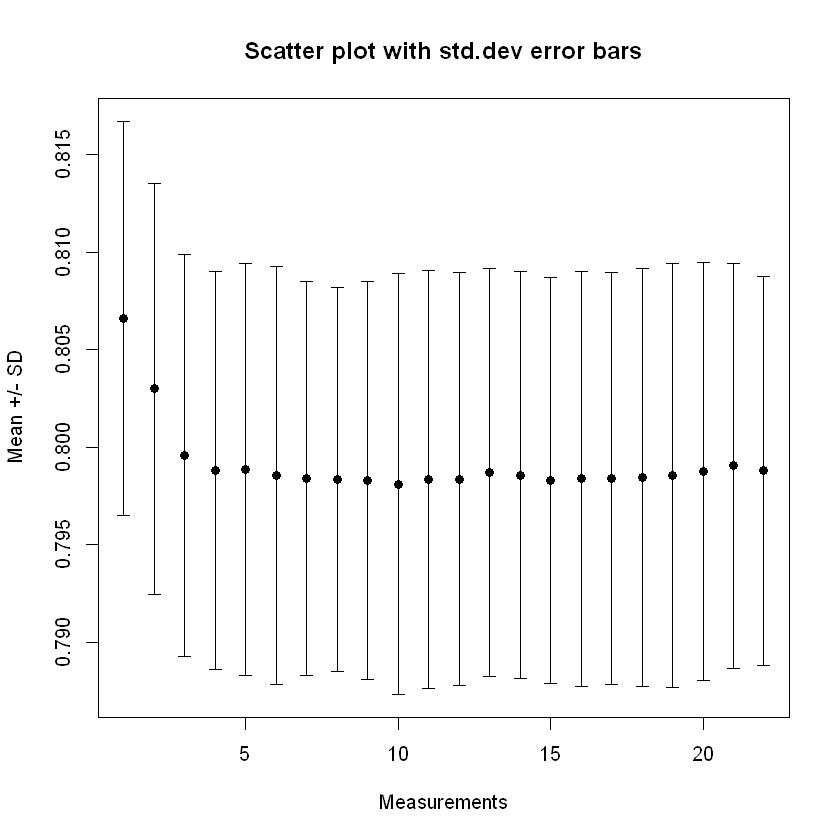

In [38]:
plot(x,colMeans(to.plot),ylim=range(c(avg-sdev, avg+sdev)),pch=19, xlab="Measurements", ylab="Mean +/- SD",
    main="Scatter plot with std.dev error bars"
)
# hack: we draw arrows but with very special "arrowheads"
arrows(x, avg-sdev, x, avg+sdev, length=0.05, angle=90, code=3)

In [33]:
data.matrix(m.train)[i.test.c]

[1] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
   [37] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
   [73] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 3 4
  [109] 4 4 3 4 3 4 3 4 4 4 4 4 3 5 3 3 4 3 3 3 3 3 3 3 3 4 4 3 4 4 5 4 4 4 4 4
  [145] 4 4 4 4 4 4 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
  [181] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 4 4 5 4 4
  [217] 4 4 4 5 4 4 5 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 3 4 5 4 4 4 4 4 4
  [253] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 3 4 3 4 4 4 4 4 4 4 4 4
  [289] 4 4 4 4 4 4 5 4 4 4 4 4 4 4 4 4 4 4 4 4 5 4 3 4 4 5 4 4 5 4 4 5 5 4 5 4
  [325] 4 4 4 4 4 4 4 5 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 4 4 4 4 4 4 4 4 4
  [361] 5 4 4 4 4 1 4 4 4 4 4 4 4 4 4 4 4 4 3 4 4 4 4 4 4 4 3 4 4 4 4 4 4 4 4 4
  [397] 5 4 4 4 5 4 4 5 4 4 4 5 5 5 5 5 5 5 5 4 5 5 4 4 4 5 5 4 4 5 5 4 4 5 4 4
  [433] 4 4 4 5 4 4 5 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 4 5 5 5 4 5 4 4 4 4
  [469] 4 4 5 4 4 4 5 4 4 5 2 5 4 4 4 4 4 4 4 4 4 4 4 4 4 5 4 4 4 4 4 4 4 4 3 4
  [505] 4 4 4 4 4 5 4 3 4 4 4 4 4 4 4 3 4 3 4 4 4 3 3 4 3 4 4 4 4 3 3 4 3 3 3 4
  [541] 4 4 3 4 3 4 4 4 4 5 4 4 4 4 5 4 5 4 4 4 4 5 4 4 4 4 4 4 5 4 4 4 4 4 4 4
  [577] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
  [613] 5 5 4 4 4 4 4 4 4 5 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 4 4 4 5 4 4 5 4 4
  [649] 4 4 4 3 4 3 4 3 4 4 4 4 3 4 4 4 4 4 4 4 4 4 5 4 4 4 4 4 4 4 3 4 4 4 4 4
  [685] 4 4 4 4 4 3 3 3 4 3 3 3 3 2 3 3 3 4 3 3 3 3 5 3 5 4 5 5 4 4 5 4 4 4 4 4
  [721] 4 4 4 5 5 4 5 5 5 5 4 5 4 5 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
  [757] 4 4 4 4 4 4 4 4 4 4 5 4 4 5 4 4 4 4 4 4 4 4 4 4 4 4 1 4 4 4 4 4 4 4 4 4
  [793] 4 4 4 4 4 4 4 4 4 4 4 4 3 3 3 4 3 3 4 3 3 3 3 4 3 4 3 4 3 3 3 3 3 3 3 4
  [829] 3 4 4 4 3 4 3 3 3 3 3 4 2 4 4 3 4 4 3 4 4 4 4 3 3 3 4 4 4 4 3 4 4 4 4 4
  [865] 4 4 4 4 4 4 4 4 4 4 4 4 4 3 3 4 3 4 4 4 3 4 3 3 4 3 4 4 4 3 4 4 3 4 4 3
  [901] 3 3 3 3 4 5 3 4 4 2 4 4 4 3 4 3 3 3 4 3 4 4 4 4 3 3 4 3 4 4 3 4 4 3 3 4
  [937] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 4 4 4
  [973] 4 4 4 4 4 4 3 3 3 3 2 2 2 3 3 3 3 3 3 2 3 3 3 5 3 3 3 3 4 4 3 3 4 4 5 4
 [1009] 4 4 5 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 5 4 4 5 5 5 5 4 5 4 4 4 4 4 4 4 4 4
 [1045] 4 4 5 4 5 4 4 4 4 4 4 4 4 4 4 4 4 4 4 1 1 1 4 4 4 4 4 2 3 3 3 3 3 3 5 4
 [1081] 3 3 5 3 3 3 4 3 3 4 4 3 3 4 4 4 4 4 4 3 3 4 2 3 3 3 4 4 2 4 4 4 3 4 4 4
 [1117] 4 4 4 4 4 4 3 3 3 4 4 4 4 3 4 4 4 4 4 3 4 4 3 3 4 3 3 4 4 3 4 4 3 3 4 3
 [1153] 4 4 4 4 3 4 4 4 5 4 4 4 4 4 4 4 4 4 5 5 4 4 4 4 5 4 4 4 4 5 5 4 4 4 4 4
 [1189] 4 4 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 [1225] 5 4 4 5 4 5 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 3 4 4 4 4 4 4 4 4 3 3 5
 [1261] 5 5 5 5 5 5 5 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 [1297] 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 [1333] 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 [1369] 5 5 5 5 5 5 5 5 5 5 5 4 4 5 4 4 3 4 5 4 4 5 4 4 5 3 4 4 4 4 4 5 5 3 4 4
 [1405] 4 4 4 4 4 4 4 4 4 4 4 3 4 4 5 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 [1441] 4 4 4 4 4 4 4 4 4 5 4 5 4 5 4 4 4 4 4 4 4 3 4 4 4 4 4 5 4 4 4 4 4 4 4 4
 [1477] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 5 4 4 4 5 5 4 5 5 4 4 5
 [1513] 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 1 5 4 4 5 5 5 5 5 5 4 5 5 5 4 5 5 4 5
 [1549] 5 5 5 5 4 5 4 4 5 4 5 5 4 5 5 5 5 5 5 5 4 5 4 5 5 5 5 5 5 4 3 4 5 5 4 4
 [1585] 4 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 1 5 4 4 4 4 5 4 4 4 3 4 4 5 4 4 5 4 4
 [1621] 4 4 4 4 4 4 4 4 4 5 3 4 5 5 4 4 4 4 4 4 4 4 5 4 3 3 5 5 4 4 4 4 4 4 4 4
 [1657] 5 4 5 4 4 4 5 4 5 4 4 4 4 2 3 4 3 3 3 5 4 4 3 3 5 3 4 3 4 3 3 4 3 4 3 3
 [1693] 4 4 5 3 4 4 4 3 4 4 4 4 3 3 4 4 4 5 4 5 5 4 5 4 4 4 4 5 4 4 4 4 4 4 4 4
 [1729] 4 4 5 5 4 4 4 4 5 5 5 5 5 4 4 4 4 5 4 4 4 5 4 4 4 4 5 4 5 5 4 4 5 4 5 4
 [1765] 4 4 4 5 5 5 5 5 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 3 5 4
 [18

In [25]:
length(i.test.c)

[1] 1586126

In [26]:
dim(m.train)

[1]  943 1682

In [27]:
943*1682

[1] 1586126